In [1]:
import random
import numpy as np
import re
import math

## 1. Escribe una función que reciba una lista de números y determine si todos sus elementos son diferentes entre si.

In [2]:
def igual(X):
    'X es una lista con números cualesquiera: reales, enteros, fracciones, etc.'
    solo = set()
    for x in X:
        solo.add(x)
    if len(solo) == len(X):
        return 'elementos únicos'
    else:
        return 'elementos repetidos'

In [3]:
test_1 = [random.random() for i in range(100000)]
test_2 = [1,2,3,4,5,6,7,8,9,0,9,8,7,6,5,4,3,2,1]

In [4]:
print(igual(test_1))
print(igual(test_2))

elementos únicos
elementos repetidos


## 3. Escribe una función que reciba el archivo de texto temperaturas.txt, el cual contiene un conjunto de datos que representan temperaturas. La función deberá regresar un diccionario con los siguientes datos:

- La temperatura máxima.
- La temperatura mínima.
- La temperatura promedio.
- La mediana de las temperaturas.

El diccionario resultado debe tener la siguiente forma: { ’maximo’: 35, ’minimo’:
15, ’promedio’: 25, ’mediana’: 28 }.

Nota: Los valores mostrados son sólo ilustrativos, no necesariamente son los valores
correctos.

In [5]:
def temperaturas():
    datos = open("temperaturas.txt")
    medidas = [float(medicion) for medicion in datos]
    medidas = sorted(medidas)
    
    N = len(medidas)
    maximo = medidas[-1]
    minimo = medidas[0]
    # Calcular el promedio
    μ = 0
    for dato in medidas:
        μ += dato
    μ /= N    
    #Calcular la mediana
    if N%2 == 1:
        mediana = medidas[int((N+1)/2)]
    else:
        mediana = (medidas[int(N/2)]+medidas[int((N+1)/2)])/2
    
    datos.close()    
    return {'máximo':maximo,'mínimo':minimo,'promedio':μ,'mediana':mediana}

temperaturas()

{'máximo': 28.2,
 'mínimo': 0.8,
 'promedio': 14.848309178743966,
 'mediana': 14.7}

# 5. El teorema del mono infinito afirma que si un mono presiona al azar teclas de un teclado de alguna computadora durante un tiempo infinito, en algún momento podrá escribir cualquier texto dado. El texto que trataremos de generar a partir de la simulación es el siguiente: "methinks it is like a weasel". La simulación se divide en tres pequeñas funciones:

- Escribe una función que genere cadenas pseudoaleatorias de longitud igual a la longitud de la cadena dada.
- Escribe una función que cuente las coincidencias de caracteres entre la cadena generada y la cadena dada. 
- Escribe una función que de forma iterativa obtenga una cadena pseudoaleatoria, calcule las coincidencias de caracteres y termine si la dicha coincidencia es completa, es decir si se generó la cadena esperada. Al final del ciclo iterativo debe imprimir el mayor número de coincidencias y la cadena que lo generó.

![alt text](1.png "Title")

In [6]:
def cad_aleatoria(cadena):
    # Generar una cadena aleatoria de la misma longitud que la cadena dada
    abc = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','ñ','o','p','q','r','s','t','u','v','w','x','y','z']
    cadena = cadena.split()
    cad_al = []
    for palabra in cadena:
        letra_al = random.sample(abc,len(palabra))
        letra_al = ''.join([str(letra) for letra in letra_al])
        cad_al.append(letra_al)
        
    cad_al = ''.join([str(letra)+' ' for letra in cad_al])    
    return cad_al.rstrip()  

In [7]:
cad_aleatoria('Al final del ciclo iterativo')

'pr qsmie ctb owehf qworzmñjt'

In [5]:
def coincidencias(cadena, cad_generada):
    # Contar el número de caracteres que coinciden en la cadena dada y la cadena generada
    cad_generada = cad_generada.split()
    i = 0
    
    for palabra,adiv in zip(cadena.split(),cad_generada):
        for letra,indov in zip(palabra,adiv):
            if letra == indov:
#                 print(letra,indov)
                i += 1
            else: continue    
    return i 

In [9]:
x = 'Un número estrobogramático, es un número que es rotacionalmente simétrico'
y = cad_aleatoria(x)
print(y)
coincidencias(x,y)

tk mauyjk xcowjgvusiapmhqnñ np ñz gyvmbf lrm ñb iwptmehnvñfxgsk vxbmzñsrk


1

In [10]:
def monkey(target, limit=1000):
    # Generar cadenas y contar coincidencias hasta que la cadena generada sea igual a la cadena target
    # el máximo de iteraciones permitido es limit, con un valor de 1000 como default
    i,max_coin,top = 0,0,''
    
    while i<limit:
        cad_al = cad_aleatoria(target)
        coin = coincidencias(target,cad_al)
        # En caso de que ambas cadenas coincidan
        if cad_al == target:
#             break
            return print("El monito funcionó \n{}".format(cad_al))
        
        if coin >= max_coin:
            max_coin = coin
            top = cad_al
        i += 1
    return print('''cadena objetivo: {} \ncadena generada: {} \ncoincidencias: {}'''.format(target,top,max_coin))

In [11]:
target = 'methinks it is like a weasel'
monkey(target,100000)

cadena objetivo: methinks it is like a weasel 
cadena generada: metyraks qf gx lica t huiqsc 
coincidencias: 7


## 7. Simular el lanzamiento de un dado para calcular la probabilidad frecuencial. 

- Escribe una función que simule el experimento de lanzar un dado, los posibles valores a obtener son: 1,2,3,4,5 o 6.

In [12]:
def dado():
    return random.randint(1,6)
dado()

6

- Escribe una función que realice n simulaciones del lanzamiento de un dado y compruebe experimentalmente que el número de veces que aparece una de las caras entre el total de lanzamientos (n) se aproxima a 1/6 conforme n crece. La función debe generar un archivo de texto donde cada renglón contenga los datos de cada lanzamiento. Los datos a escribir son: número de simulación, resultado obtenido y los cocientes $n_c/i$, donde $n_c$ es la cantidad de veces cayó la cara $c \in \{1, 2, 3, 4, 5, 6\}$ e $i$ es la cantidad de lanzamientos realizados hasta el momento. 

![image.png](3.png)

In [13]:
def sim_dado(n):
    # Simular n tiros de dados y escribir en el archivo datos.txt los datos pedidos, con un formato adecuado 
    datos = open('datos.txt','w')
    datos.write("No.  Resultado    n_1/i     n_2/i      n_3/i       n_4/i     n_5/i      n_6/i\n")
    
    resultados = {'{}'.format(i):0 for i in range(1,7)}
    for i in range(1,n+1):
        valor = dado()
        resultados[str(valor)] += 1
        renglon = "{}        {}        {}        {}        {}        {}        {}        {}\n".format(i,valor,(resultados['1']/i),(resultados['2']/i)
                                                                                                    ,(resultados['3']/i),(resultados['4']/i)
                                                                                                    ,(resultados['5']/i),(resultados['6']/i))
#         print(renglon)

        datos.write(renglon)
    datos.close()
    return resultados #La función devuelve un diccionario con los números como llaves y su respectivo conteo

In [14]:
sim_dado(20000)

{'1': 3405, '2': 3253, '3': 3356, '4': 3360, '5': 3279, '6': 3347}

# Problema 9

Una forma de aproximar $\pi$ dada la sección ubicada en el primer cuadrante del circulo unitario.

Escribe una función que genere los valores pseudoaleatorios (x,y) con distribución uniforme dentro del intervalo (0, 1), independiente un valor del otro. Si se tiene que $y \leq \sqrt{1 − x^2}$, entonces el punto (x,y) está dentro del cuarto de círculo. En caso contrario se considera un fracaso. Así, al repetir varias veces este procedimiento, el cociente del número de éxitos $n_E$ entre el número de ensayos $n$ será una aproximación del área de la región. Siendo una cuarta parte del círculo unitario, su área es $\pi/4$. La función recibe como argumento el valor de $n$ y debe regresar el valor de la aproximación de $\pi$. Para este ejercicio puedes utilizar la función uniform del modulo random de Python.

In [15]:
def π_aprox(n):
    eventos = [(random.uniform(0,1),random.uniform(0,1)) for i in range(n)]
    exitos, ensayos = 0,0
    for x,y in eventos:
        if y <= math.sqrt(1-x**2):
            exitos += 1
        ensayos += 1
    π = 4*(exitos/ensayos)
    return π

In [16]:
π_aprox(10000000)

3.1413972

# Problema 11

Regresa una lista con todos los nombres del siguiente string

In [17]:
s = "Juan decidió tomar el curso, convenció a su amigo Luis de inscribirlo"

In [18]:
def nombres(s):
    #Asumimos que todos los nombres empiezan con mayuscula
    match = re.compile('[A-Z]\w+')
    return match.findall(s)

In [19]:
nombres(s)

['Juan', 'Luis']

# Problema 13

Sustituye las apariciones de la cadena "the the" por la cadena "the" del siguiente string:

s = "If the the problem is textual use the the re module"

In [20]:
def anti_the(cadena):
    cadena = cadena.replace('the the','the')
    return cadena

In [21]:
s = "If the the problem is textual use the the re module"
anti_the(s)

'If the problem is textual use the re module'

# Problema 15

Escriba una función llamada operations que tome como entrada dos enteros positivos h y w, haga dos matrices aleatorias A y B, de tamaño h x w, y devuelva A, B y S, la suma de A y B.

In [22]:
def operations(h,w):
    A = np.random.rand(h,w)
    B = np.random.rand(h,w)
    S = A + B
    return A,B,S

In [23]:
operations(3,3)

(array([[0.10093206, 0.19711636, 0.57289071],
        [0.01130884, 0.25989081, 0.58596402],
        [0.48062346, 0.15704315, 0.20564857]]),
 array([[0.85377689, 0.93463685, 0.21923712],
        [0.873197  , 0.45312646, 0.68701787],
        [0.48460322, 0.31617388, 0.42751304]]),
 array([[0.95470895, 1.13175321, 0.79212783],
        [0.88450584, 0.71301727, 1.27298189],
        [0.96522668, 0.47321703, 0.63316162]]))

# Problema 17

Una red neuronal es una herramienta poderosa que se utiliza a menudo en el aprendizaje automático. Usaremos a las redes neuronales (en su forma más simplificada) para motivar el uso de Numpy. 

Revisamos la red neuronal más simple aquí:

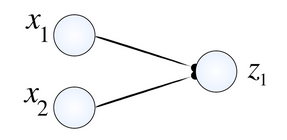

La salida de la red neuronal, $z_1$, depende de las entradas $x_1$ y $x_2$. La importancia de cada una de las entradas viene dada por valores llamados pesos. Hay un peso de cada entrada para cada salida. Mostramos esto aquí:

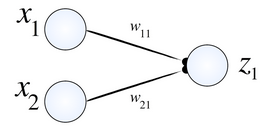

Las entradas están dadas por $x$, y las salidas están dadas por $z_1$. Aquí, $w_{11}$ es el peso de la entrada 1 en la salida 1 (nuestra única salida en este caso), y $w_{21}$ es el peso de la entrada 2 en la salida 1. En general, $w_{ij}$ representa el peso de la entrada $i$ sobre la salida $j$.

La salida, $z_1$, viene dada por $z_1=f(w_{11}x_1+w_{21}x_2)$
:

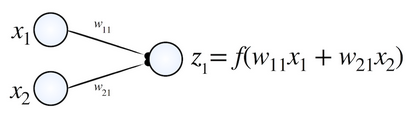

donde $f$ es una función no lineal especificada, y generalmente es la función tangente hiperbólica, $tanh$.

Si expresamos nuestras entradas y pesos como matrices, como se muestra aquí,

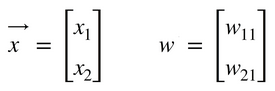

entonces podemos desarrollar una expresión matemática elegante: 

$z_1 = tanh\left( w^T \vec{x} \right)$

Escribe una función neural_network, que aplicará una operación de red neuronal con 2 entradas y 1 salida y una matriz de peso dada.

La función debe tomar dos argumentos: inputs y weights, dos matrices NumPy de shape (2,1) y debe devolver una matriz NumPy de forma (1,1), la salida de la red neuronal. No olvides la activación.

In [24]:
def neural_network(inputs, weights):
    z = np.tanh(np.dot(weights,inputs))
    return np.array(z)

In [25]:
inpt = np.array([1,2])
wght = np.array([0.2,0.6])
neural_network(inpt,wght)

array(0.88535165)

# Problema 18

Comencemos escribiendo una función escalar scalar_function, que aplicará la siguiente operación con la entrada $x$ e $y$.

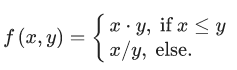

In [26]:
def scalar_function(x,y):
    if x <= y: return x*y
    else : return x/y

# Problema 19 

scalar_function sólo puede manejar entradas escalares, podríamos usar la función np.vectorize() para convertirla en una función vectorizada. Tenga en cuenta que el argumento de entrada de np.vectorize() debe ser una función escalar, y la salida de np.vectorize() es una nueva función que puede manejar la entrada de vectores.

Escriba una función vectorial vector_function, que aplicará la operación definida anteriormente de manera inteligente con vectores de entrada con la misma dimensión x e y.

In [27]:
vector_function = np.vectorize(scalar_function)    

In [28]:
# Podemos ver que la función es aplicada entrada por entrada
x = np.random.randint(1,20,size=(2,2))
y = np.random.randint(1,20,size=(2,2))
print('x=\n',x)
print('y=\n',y)
vector_function(x,y)

x=
 [[ 3 12]
 [10 17]]
y=
 [[6 9]
 [8 9]]


array([[18,  1],
       [ 1,  1]])